#Sales task Bot Squad#
##Goal##
##The goal of the task is to predict the number of sales in a given store (use store_ID) on a give date (use date)
The metric we are trying to optimize is **MAE**

## Dataset Overview
The dataset contains the following columns:
- `store_ID`: Identifier for a store.
- `day_of_week`: Day of the week (1–7).
- `date`: Date of sales.
- `nb_customers_on_day`: Number of customers on the day.
- `open`: Whether the store was open (1 for open, 0 for closed).
- `promotion`: Whether a promotion was active (1 for yes, 0 for no).
- `state_holiday`: Whether it was a state holiday (1 for yes, 0 for no).
- `school_holiday`: Whether it was a school holiday (1 for yes, 0 for no).
- `sales`: The target variable — total sales.
## Project Workflow
1. **Before Beginning**
   - Define the problem.
   - Define success metrics.
   - Perform exploratory data analysis.
2. **Training**
   - Data cleaning.
   - Split data into train and test sets.
   - Perform feature engineering.
   - Train and select the model.
   - Evaluate the model.
3. **Deployment**
   - Implement model pipeline for real-life data predictions.
   - Monitor performance.









#Step 1: Define the problem##



###Predicting the number of sales in a given store on a specific date using historical sales data.###

#Step 2: Define success metrics#

##Mean Absolute Error (MAE) will be used to evaluate the accuracy of the predictions##

#Step 3:  Exploratory Data Analysis#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/sales.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


#Step 4: Data cleaning#

In [ ]:
data = df.drop('Unnamed: 0', axis=1)
data.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [ ]:
data.isna().sum()

,0
store_ID,0
day_of_week,0
date,0
nb_customers_on_day,0
open,0
promotion,0
state_holiday,0
school_holiday,0
sales,0


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  object        
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 44.0+ MB


In [ ]:
print(data['state_holiday'].unique())

['0' 'a' 'c' 'b']


In [ ]:
data['state_holiday']=data['state_holiday'].replace({'0':0, 'a': 1, 'c': 1,'b':1})

<ipython-input-179-6019d49fb14d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['state_holiday']=data['state_holiday'].replace({'0':0, 'a': 1, 'c': 1,'b':1})


In [ ]:
print(data['state_holiday'].unique())

[0 1]


In [ ]:
data.state_holiday.value_counts()

,count
state_holiday,
0,621160
1,19680


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  int64         
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 44.0 MB


<Axes: >

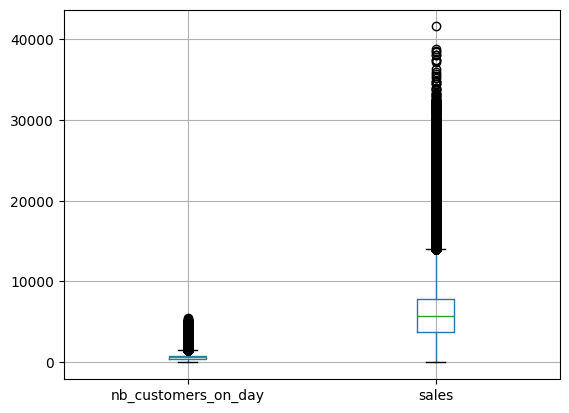

In [ ]:
data[['nb_customers_on_day', 'sales']].describe()
data.boxplot(column=['nb_customers_on_day', 'sales'])

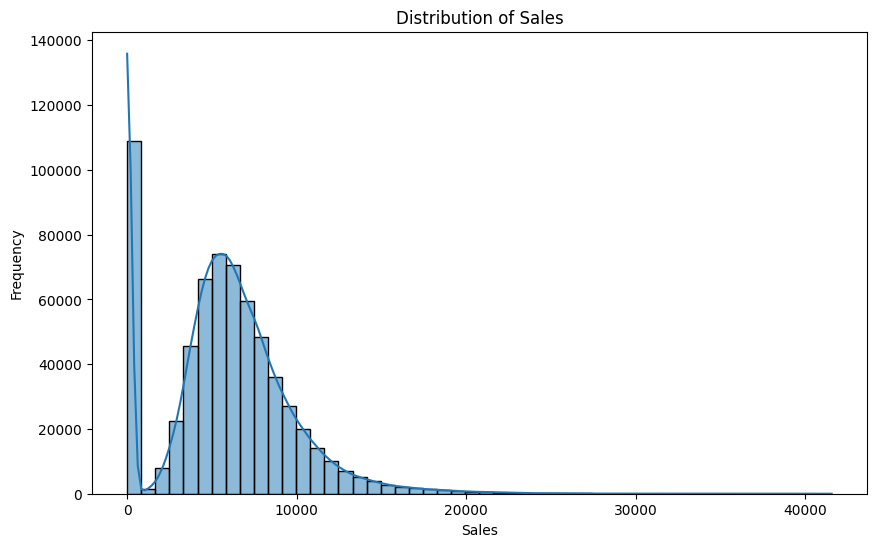

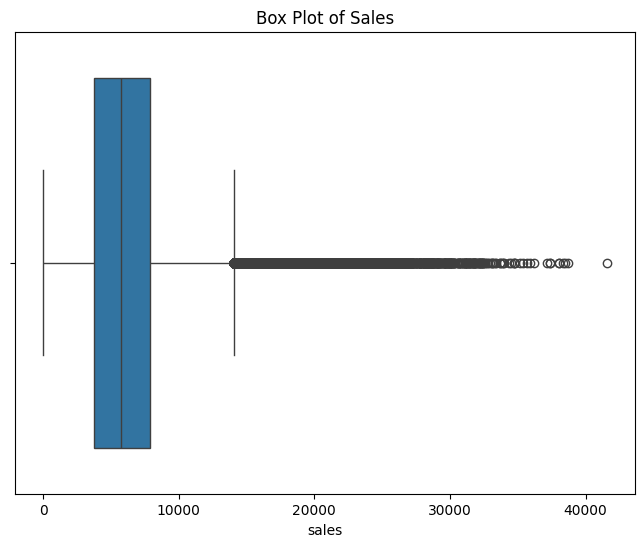

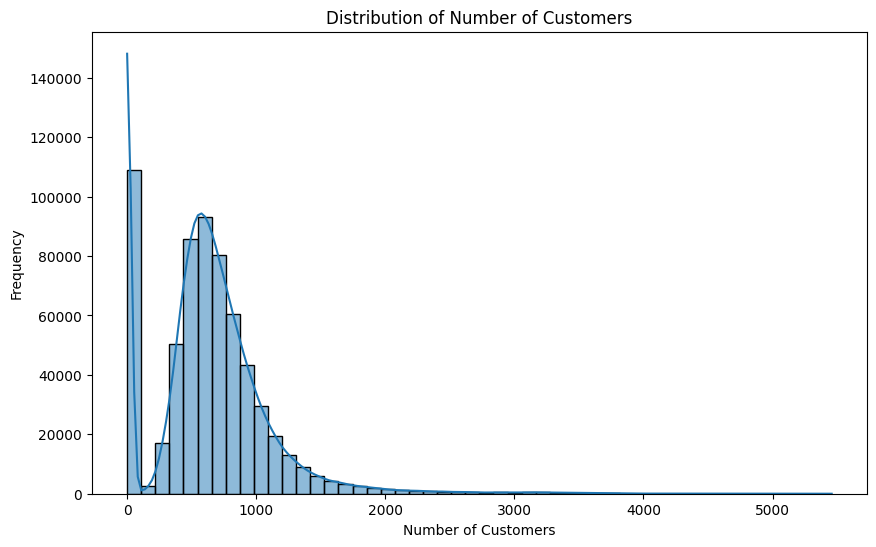

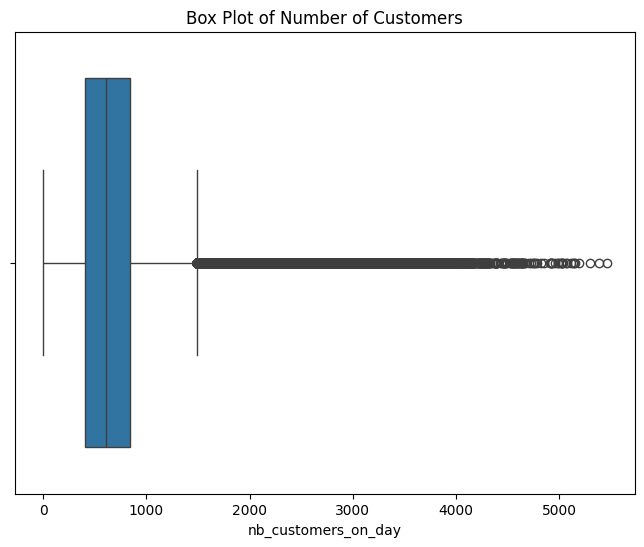

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
# Box plot for sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sales'])
plt.title('Box Plot of Sales')
plt.show()
# Histogram for number of customers
plt.figure(figsize=(10, 6))
sns.histplot(df['nb_customers_on_day'], bins=50, kde=True)
plt.title('Distribution of Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()
# Box plot for number of customers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['nb_customers_on_day'])
plt.title('Box Plot of Number of Customers')
plt.show()

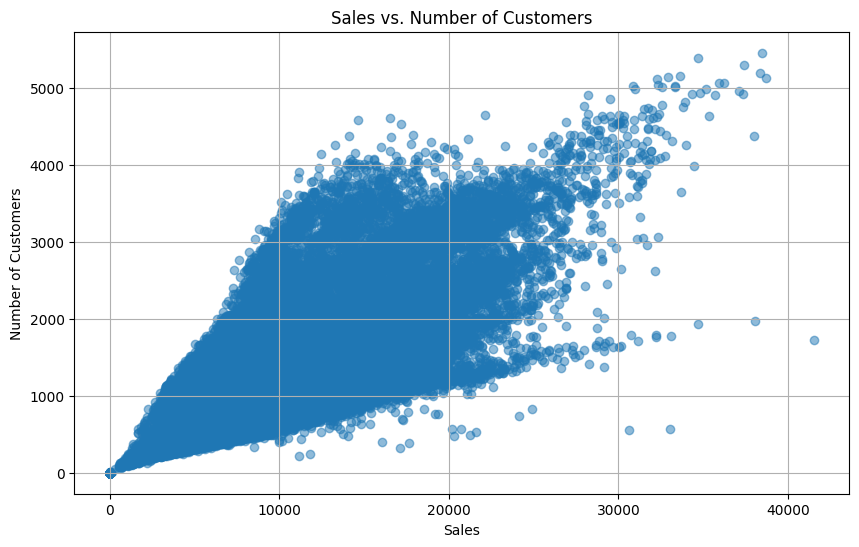

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter( data['sales'], data['nb_customers_on_day'], alpha=0.5)  # Alpha for transparency
plt.title('Sales vs. Number of Customers')
plt.xlabel('Sales')
plt.ylabel('Number of Customers')
plt.grid(True)  # Add a grid for better readability
plt.show()

#Step 5:Split data into train and test sets#

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
orded_data = data.sort_values(by='date')
orded_data

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
296090,401,2,2013-01-01,0,0,0,1,1,0
520181,679,2,2013-01-01,0,0,0,1,1,0
183479,892,2,2013-01-01,0,0,0,1,1,0
360138,312,2,2013-01-01,0,0,0,1,1,0
302547,250,2,2013-01-01,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
486356,621,5,2015-07-31,870,1,1,0,1,7296
142723,385,5,2015-07-31,740,1,1,0,0,8807
476061,96,5,2015-07-31,612,1,1,0,1,6370
256373,914,5,2015-07-31,1178,1,1,0,1,11972


In [ ]:
train_size = 0.8  # Adjust the training size as needed
train_index = int(train_size * len(orded_data))
train_orded_data = orded_data[:train_index]
test_orded_data = orded_data[train_index:]
# Alternatively, using sklearn's train_test_split with shuffle=False
X = orded_data.drop('sales', axis=1)  # Features
y = orded_data['sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  shuffle=False)

In [ ]:
X_train

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
296090,401,2,2013-01-01,0,0,0,1,1
520181,679,2,2013-01-01,0,0,0,1,1
183479,892,2,2013-01-01,0,0,0,1,1
360138,312,2,2013-01-01,0,0,0,1,1
302547,250,2,2013-01-01,0,0,0,1,1
...,...,...,...,...,...,...,...,...
99876,83,5,2015-01-30,398,1,1,0,0
414592,544,5,2015-01-30,1819,1,1,0,0
477614,1054,5,2015-01-30,769,1,1,0,0
455636,541,5,2015-01-30,997,1,1,0,0


In [ ]:
X_test

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
578385,420,5,2015-01-30,421,1,1,0,0
333458,759,5,2015-01-30,1018,1,1,0,0
166970,317,5,2015-01-30,663,1,1,0,0
126430,154,5,2015-01-30,802,1,1,0,0
431101,184,5,2015-01-30,707,1,1,0,0
...,...,...,...,...,...,...,...,...
486356,621,5,2015-07-31,870,1,1,0,1
142723,385,5,2015-07-31,740,1,1,0,0
476061,96,5,2015-07-31,612,1,1,0,1
256373,914,5,2015-07-31,1178,1,1,0,1


#Step 6: Perform Baseline Model#

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Assuming your DataFrame is named 'data'
# 1. Convert 'date' to datetime and extract numerical features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek
# 2. Drop the original 'date' column
data = data.drop('date', axis=1)
# 3. Now split the data into training and testing sets
X = data.drop('sales', axis=1)
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# 4. Create and train the model, and make predictions
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 987.2078085507749


In [ ]:
print(X_train.dtypes)

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                   int64
school_holiday                  int64
dtype: object


In [ ]:
# Define the Mean Absolute Error (MAE) and Mean of Sales
mae = 998  # Replace with your actual MAE value
mean_sales = 5777  # Replace with the mean of your sales data
# Calculate the relative error
relative_error = (mae / mean_sales) * 100
# Print the result
print(f"Relative Error: {relative_error:.2f}%")

Relative Error: 17.28%


#Step 7: Perform feature engineering#

In [ ]:
def prepare_data(data):
    if 'date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['date']):
        data['date'] = pd.to_datetime(data['date'])
    if 'date' in data.columns:
        data['year'] = data['date'].dt.year
        data['month'] = data['date'].dt.month
        data['day'] = data['date'].dt.day
        data['day_of_week'] = data['date'].dt.dayofweek
        data['sales_lag_7'] = data['sales'].shift(7)
        data['sales_rolling_avg_7'] = data['sales'].rolling(window=7).mean()
        data = data.sort_values(by=['date'])
        data = data.drop('date', axis=1)
    return data

In [ ]:
data.state_holiday.value_counts()

,count
state_holiday,
0,621160
1,19680


#Step 8: Train and select the model#

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data = prepare_data(data)
X = data.drop('sales', axis=1)
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
X_train

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day,dayofweek
0,366,4,517,1,0,0,0,2013,4,18,3
1,394,6,694,1,0,0,0,2015,4,11,5
2,807,4,970,1,1,0,0,2013,8,29,3
3,802,2,473,1,1,0,0,2013,5,28,1
4,726,4,1068,1,1,0,0,2013,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...
512667,247,1,905,1,1,0,0,2013,11,4,0
512668,1015,3,0,0,0,1,1,2014,1,1,2
512669,516,7,0,0,0,0,0,2014,6,1,6
512670,705,1,1157,1,1,0,0,2014,11,24,0


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
# Create an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


#Step 9: Evaluate the model#

```

```



In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 679.9923677864386


In [ ]:
# Calculate and print the relative error
relative_error = (mae / mean_sales) * 100
print(f"Relative Error after XGBoost: {relative_error:.2f}%")

Relative Error after XGBoost: 11.77%


In [ ]:
y_pred = model.predict(X_train)  # Predict on X_train, not y_train
mae_1 = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error (MAE): {mae_1}")

Mean Absolute Error (MAE): 669.5182721198362


In [ ]:
# Calculate and print the relative error
relative_error = (mae_1/ mean_sales) * 100
print(f"Relative Error after XGBoost: {relative_error:.2f}%")

Relative Error after XGBoost: 11.59%


# Step 10: Implement model pipeline for real-life data predictions#

In [ ]:
real_data = pd.read_csv('/content/real_data_sales.csv')
real_data

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,26/10/2014,0,0,0,0,0
71201,687449,377,7,18/08/2013,0,0,0,0,0
71202,207393,15,3,11/06/2014,648,1,0,0,0
71203,233378,950,2,23/04/2013,626,1,1,0,0


In [ ]:
#cleaning
real_data['date'] = pd.to_datetime(real_data['date'], dayfirst=True)
real_data['day'] = real_data['date'].dt.day
real_data['month'] = real_data['date'].dt.month
real_data['year'] = real_data['date'].dt.year
columns_to_drop = ['date', 'state_holiday', 'school_holiday', 'index']
real_data_cleaned = real_data.drop(columns=[col for col in columns_to_drop if col in real_data.columns], axis=1)
real_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   store_ID             71205 non-null  int64
 1   day_of_week          71205 non-null  int32
 2   nb_customers_on_day  71205 non-null  int64
 3   open                 71205 non-null  int64
 4   promotion            71205 non-null  int64
 5   year                 71205 non-null  int32
 6   month                71205 non-null  int32
 7   day                  71205 non-null  int32
dtypes: int32(4), int64(4)
memory usage: 3.3 MB


In [ ]:
lin

LinearRegression()

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
n = pd.read_csv('/content/REAL_DATA_with_predictions.csv')
n

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day,dayofweek,predicted_sales
0,415,6,0,0,0,0,0,2015,3,1,0,200.24422
1,27,6,0,0,0,0,0,2013,12,29,0,52.20192
2,404,2,657,1,1,0,0,2014,3,19,0,6774.65100
3,683,1,862,1,0,0,0,2013,1,29,0,7230.69140
4,920,2,591,1,1,0,0,2014,3,19,0,6108.04540
...,...,...,...,...,...,...,...,...,...,...,...,...
71200,441,6,0,0,0,0,0,2014,10,26,0,-151.32256
71201,377,6,0,0,0,0,0,2013,8,18,0,-55.26562
71202,15,2,648,1,0,0,0,2014,6,11,0,5378.20460
71203,950,1,626,1,1,0,0,2013,4,23,0,6712.98400


In [ ]:

# Ensure all columns from the training data exist in the prediction dataset
missing_cols = set(X.columns) - set(real_data_cleaned.columns)
for col in missing_cols:
    real_data_cleaned[col] = 0  # Add missing columns with a default value of 0

# Ensure the columns are in the same order as the training data
real_data_cleaned = real_data_cleaned[X.columns]

# Make predictions using the trained model
predictions = model.predict(real_data_cleaned)

#postproccessing
predictions = [max(0, pred) for pred in predictions]

real_data_cleaned['predicted_sales'] = predictions



real_data_cleaned.to_csv('REAL_DATA_with_predictions.csv', index=False)

print(real_data_cleaned.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  state_holiday  \
0       415            6                    0     0          0              0   
1        27            6                    0     0          0              0   
2       404            2                  657     1          1              0   
3       683            1                  862     1          0              0   
4       920            2                  591     1          1              0   

   school_holiday  year  month  day  dayofweek  predicted_sales  
0               0  2015      3    1          0       200.244217  
1               0  2013     12   29          0        52.201920  
2               0  2014      3   19          0      6774.650879  
3               0  2013      1   29          0      7230.691406  
4               0  2014      3   19          0      6108.045410  


In [ ]:
real_data_cleaned['predicted_sales'].describe()

,predicted_sales
count,71205.000000
mean,5819.923407
std,3721.028242
min,0.000000
25%,4020.380371
50%,5867.038086
75%,7814.306641
max,31422.496094


In [ ]:
real_data_pred = pd.read_csv('/content/REAL_DATA_with_predictions.csv')
real_data_pred

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day,dayofweek,predicted_sales
0,415,6,0,0,0,0,0,2015,3,1,0,200.244217
1,27,6,0,0,0,0,0,2013,12,29,0,52.201920
2,404,2,657,1,1,0,0,2014,3,19,0,6774.650879
3,683,1,862,1,0,0,0,2013,1,29,0,7230.691406
4,920,2,591,1,1,0,0,2014,3,19,0,6108.045410
...,...,...,...,...,...,...,...,...,...,...,...,...
71200,441,6,0,0,0,0,0,2014,10,26,0,0.000000
71201,377,6,0,0,0,0,0,2013,8,18,0,0.000000
71202,15,2,648,1,0,0,0,2014,6,11,0,5378.204590
71203,950,1,626,1,1,0,0,2013,4,23,0,6712.983887


#Hyperparmeters#

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],

}

# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for scoring
    cv=5,  # Number of cross-validation folds
    verbose=2
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE score: ", -grid_search.best_score_)  # Note the negative sign

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE on test set: {mae}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   8.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=   5.9s
[CV] END ......................max_depth=3, n_estimators=200; total time=   3.1s
[CV] END ......................max_depth=3, n_estimators=200; total time=   3.2s
[CV] END ......................max_depth=3, n_estimators=200; total time=   5.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=   3.2s
[CV] END ......................max_depth=3, n_estimators=300; total time=   4.4s
[CV] END ......................max_depth=3, n_est

In [292]:

# Create an XGBoost model with the best parameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    max_depth=7,  # Use the best max_depth
    n_estimators=300  # Use the best n_estimators
)

# Fit the best model to your training data (if it's not already fitted)
best_model.fit(X_train, y_train)
# ... (your code to create and train best_model) ...

# Before making predictions, select only the necessary columns from real_data_cleaned
real_data_cleaned_for_prediction = real_data_cleaned[X_train.columns]

predictions = best_model.predict(real_data_cleaned_for_prediction)


predictions = [max(0, pred) for pred in predictions]

real_data_cleaned['predicted_sales'] = predictions

real_data_cleaned.to_csv('REAL_DATA_with_predictions.csv', index=False)

print(real_data_cleaned.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  state_holiday  \
0       415            6                    0     0          0              0   
1        27            6                    0     0          0              0   
2       404            2                  657     1          1              0   
3       683            1                  862     1          0              0   
4       920            2                  591     1          1              0   

   school_holiday  year  month  day  dayofweek  predicted_sales  
0               0  2015      3    1          0        87.229393  
1               0  2013     12   29          0         0.000000  
2               0  2014      3   19          0      6758.621582  
3               0  2013      1   29          0      8026.881348  
4               0  2014      3   19          0      5907.976562  


In [293]:
REAL_DATA_with_predictions = pd.read_csv('/content/REAL_DATA_with_predictions.csv')
REAL_DATA_with_predictions

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day,dayofweek,predicted_sales
0,415,6,0,0,0,0,0,2015,3,1,0,87.229393
1,27,6,0,0,0,0,0,2013,12,29,0,0.000000
2,404,2,657,1,1,0,0,2014,3,19,0,6758.621582
3,683,1,862,1,0,0,0,2013,1,29,0,8026.881348
4,920,2,591,1,1,0,0,2014,3,19,0,5907.976562
...,...,...,...,...,...,...,...,...,...,...,...,...
71200,441,6,0,0,0,0,0,2014,10,26,0,0.000000
71201,377,6,0,0,0,0,0,2013,8,18,0,0.000000
71202,15,2,648,1,0,0,0,2014,6,11,0,5392.484375
71203,950,1,626,1,1,0,0,2013,4,23,0,7266.486328


In [ ]:
real_data_cleaned['predicted_sales'].describe()

,predicted_sales
count,71205.000000
mean,5814.858701
std,3766.179609
min,0.000000
25%,3957.814697
50%,5834.634277
75%,7826.462402
max,33003.984375
